# Capstone Project on TED talk analysis : Data Storytelling

Springboard Data Science Career Track ; 
Author : Pavan Poosarla, pavanpoosarla01@gmail.com

Start Date : 2/ 05/ 2019
Description :
This is second section of the capstone project on data storytelling. For the first part on Data Wrangling, see "Capstone1_DataWrangling.ipynb".
In this section, we will look at the dataset and extract useful insights about the data. 

Original Date Source
https://www.kaggle.com/rounakbanik/ted-talks/downloads/ted-talks.zip/3

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [205]:
# Read the output of Data Wrangling
df_clean = pd.read_csv(r'After_DataWrang_Out.csv', index_col = 0)
df_clean.index.name = "index"

In [206]:
print ('Shape is', df_clean.shape)
df_clean.head(3)

Shape is (2412, 41)


,comments,description,duration,event,film_date,main_speaker,published_date,ratings,speaker_occupation,tags,...,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring,event_type
index,,,,,,,,,,,,,,,,,,,,,
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,Ken Robinson,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",...,242,7346,10581,300,10704,4439,1174,209,24924,TED
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,Al Gore,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",Climate advocate,"['alternative energy', 'cars', 'climate change...",...,62,443,132,258,268,116,203,131,413,TED
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,David Pogue,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",...,27,395,166,104,230,54,146,142,230,TED


The dataset consists a total of 2412 talks.

In [207]:
df_clean.columns

Index(['comments', 'description', 'duration', 'event', 'film_date',
       'main_speaker', 'published_date', 'ratings', 'speaker_occupation',
       'tags', 'title', 'transcript', 'film_datestamp', 'pub_datestamp',
       'sentence_count', 'aud_reaction_dict', 'word_count', 'applause',
       'laughter', 'music', 'cheering', 'sighs', 'singing', 'video', 'audio',
       'ratings_dict', 'Funny', 'Beautiful', 'Ingenious', 'Courageous',
       'Longwinded', 'Confusing', 'Informative', 'Fascinating', 'Unconvincing',
       'Persuasive', 'Jaw-dropping', 'OK', 'Obnoxious', 'Inspiring',
       'event_type'],
      dtype='object')

In [208]:
# Drop extra columns that are not relevant or redundant
df_clean = df_clean.drop(columns = ["film_date", "published_date", "ratings", "comments", "aud_reaction_dict", "ratings_dict"])

In [209]:
df_clean.shape

(2412, 35)

In [210]:
# We create a new column 'Max Rating' that lists the reaction with maximum frequency
ratings_cols = ['Jaw-dropping', 'Obnoxious', 'Confusing', 'Fascinating', 'Persuasive', 'Informative', 'Inspiring', 
                'Unconvincing', 'OK', 'Funny', 'Beautiful', 'Ingenious', 'Courageous','Longwinded']        


In [211]:
len(ratings_cols)

14

## Look for Correlations between ratings

In [212]:
ratings_df = df_clean[ratings_cols]
type(ratings_df)
ratings_df.head()

,Jaw-dropping,Obnoxious,Confusing,Fascinating,Persuasive,Informative,Inspiring,Unconvincing,OK,Funny,Beautiful,Ingenious,Courageous,Longwinded
index,,,,,,,,,,,,,,
0,4439,209,242,10581,10704,7346,24924,300,1174,19645,4573,6073,3253,387
1,116,131,62,132,268,443,413,258,203,544,58,56,139,113
2,54,142,27,166,230,395,230,104,146,964,60,183,45,78
3,230,35,32,132,460,380,1070,36,85,59,291,105,760,53
4,3736,61,72,4606,2542,5433,2893,67,248,1390,942,3202,318,110


In [213]:
ratings_count = ratings_df.sum(axis = 0)

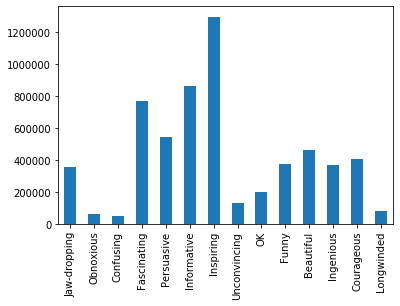

In [214]:
ratings_count.plot.bar()

As can be seen , we notice significant variation in the number of ratings. Number of the talks with negative connotations, like "OK", "Longwinded" or "Obnoxious" are relatively few. We want to explore the ratings further to see if there is any correlation between each other. If correlation exists, it could help us combine or drop extra categories

In [215]:
# Plot a seaborn pairplot
# sns.pairplot(ratings_df)

In [216]:
rating_corr = ratings_df.corr()
# rating_corr

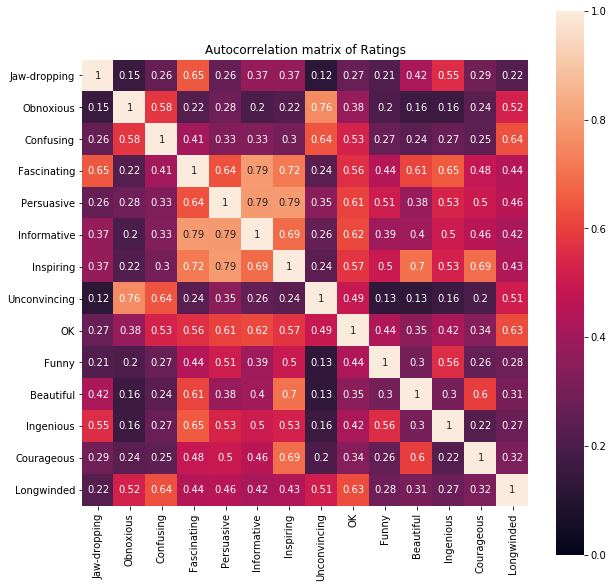

In [217]:
_ = plt.figure(figsize = (10,10))
_ = plt.title("Autocorrelation matrix of Ratings")
sns.heatmap(rating_corr, vmin = 0, vmax = 1, annot = True, square = True)

Some of the observations from the heatplot are as follows
1. 'Inspring' is strongly correlated to 'Persuasive'. This is understandable based on the similarity in meanings
2. Negative sentiments are highly correlated. Example, "Obnoxious" and "Unconvincing", "Longwinded" and "Confusing", etc. As the number of negative ratings are low, we will group all of these under 'BadTalk'
2. Some of the ratings seem to have multiple connotations. For example, 'Jaw-dropping' is correlated to 'Fascinating' as well as 'Confusing'. As meaning is unclear, we make a call to drop it, expecting the sentiment to be captured elsewhere
3. Similarly, 'OK' also has strong correlations to 'Longwinded', 'Informative', 'Persuasive', and 'Inspiring'. WE will drop this column too hoping the sentiment is getting captured elsewhere
4. 'Funny' is a unique reaction unto itself. So, we do not see any strong correlation to other items. Some talks may be Funny and Persuasive while others may be Funny and Inspiring. However, it is a positive connotation
5. 'Ingenious' is also a strongly correlated to 'Fascinating'. We will combine both
6. 'Informative' is strongly correlated to 'Facinating' and 'Persuasive'
7. 'Courageous' and 'Inspiring' are very well correlated as well

In [218]:
df_clean.drop(columns = ['Jaw-dropping', 'OK'], inplace = True)

Text(0.5, 1.0, 'Scatter Plot, Persuasive vs Inspiring')

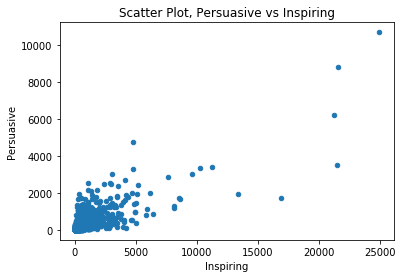

In [219]:
# From heatplot, 'Inspiring' and 'Persuasive' are very well correlated
ratings_df.plot.scatter('Inspiring', 'Persuasive')
# Lets add both columns and drop 'Persuasive'
df_clean.Inspiring = df_clean.Persuasive + df_clean.Inspiring
df_clean.drop(columns = 'Persuasive', inplace = True)
plt.title('Scatter Plot, Persuasive vs Inspiring')

Text(0.5, 1.0, 'Scatter Plot, Ingenious vs Fascinating')

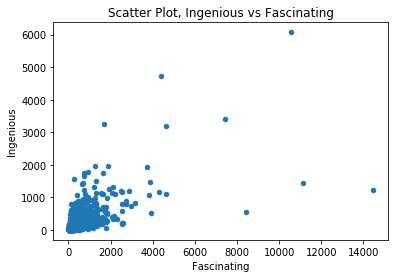

In [220]:
# 'Ingenious' and 'Fascinating' are well correlated
ratings_df.plot.scatter('Fascinating', 'Ingenious')
# Lets add both columns and drop 'Persuasive'
df_clean.Fascinating = df_clean.Fascinating + df_clean.Ingenious
df_clean.drop(columns = 'Ingenious', inplace = True)
plt.title('Scatter Plot, Ingenious vs Fascinating')

Text(0.5, 1.0, 'Scatter Plot, Ingenious vs Fascinating')

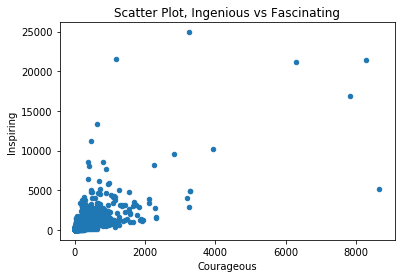

In [221]:
# 'Courageous' and 'Inspiring' are well correlated
ratings_df.plot.scatter('Courageous', 'Inspiring')
# Lets add both columns and drop 'Courageous'
df_clean.Inspiring = df_clean.Inspiring + df_clean.Courageous
df_clean.drop(columns = 'Courageous', inplace = True)
plt.title('Scatter Plot, Ingenious vs Fascinating')

Similarly for "Ubnoxious" and "Unconvincing", "Longwinded" and "Confusing"

Text(0.5, 1.0, 'Scatter Plot, Longwinded vs Confusing')

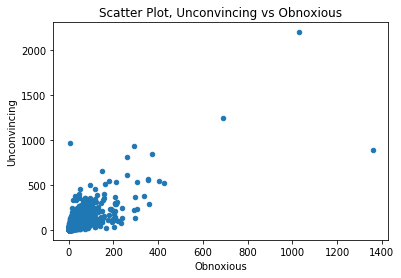

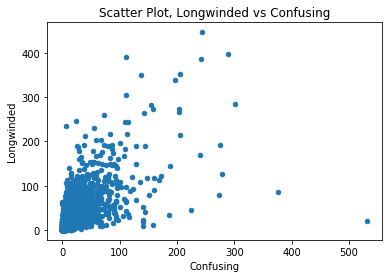

In [222]:
# For "Obnoxious" and "Unconvincing", "Longwinded" and "Confusing"
ratings_df.plot.scatter('Obnoxious', 'Unconvincing')
plt.title('Scatter Plot, Unconvincing vs Obnoxious')
ratings_df.plot.scatter('Confusing', 'Longwinded')
plt.title('Scatter Plot, Longwinded vs Confusing')


In [223]:
# Add "Unconvincing" to "Obnoxious", "Confusing" and "Longwinded" into "BadTalk" and drop negative correlations
df_clean['BadTalk'] = df_clean.Unconvincing + df_clean.Obnoxious + df_clean.Confusing + df_clean.Longwinded
df_clean.drop(columns = ['Obnoxious', 'Unconvincing', 'Confusing', 'Longwinded'], inplace = True)


In [224]:
ratings_new = list(set(ratings_cols) -set(['Courageous','Ingenious', 'Inspiring','OK','Jaw-dropping', 'Longwinded', 'Obnoxious', 'Persuasive','Unconvincing', 'Confusing']))
ratings_new.append('BadTalk')
ratings_new

['Funny', 'Fascinating', 'Informative', 'Beautiful', 'BadTalk']

In [225]:
# Create a Column with max ratings
df_clean['Max_rating'] = df_clean[ratings_new].idxmax(axis = 1)

In [226]:
print ('The talks are from a total of %d events'%len(set(list(df_clean['event']))))

The talks are from a total of 318 events


In [227]:
df_clean['Max_rating'].describe()

count            2412
unique              5
top       Fascinating
freq              911
Name: Max_rating, dtype: object

Text(0.5, 1.0, 'Number of talks with given Max Rating')

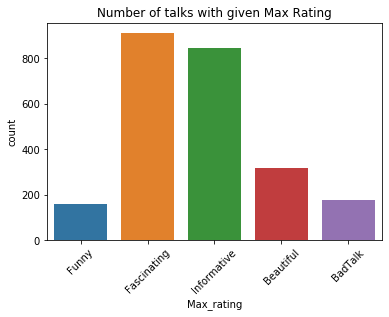

In [228]:
# Plot frequencies of each category of rating
_ = sns.countplot(data = df_clean, x ='Max_rating', order = ratings_new, orient = 'h')
_.set_xticklabels(labels = ratings_new, rotation=45)
plt.title('Number of talks with given Max Rating')

In [229]:
df_clean.groupby(['Max_rating']).count().title

Max_rating
BadTalk        177
Beautiful      319
Fascinating    911
Funny          161
Informative    844
Name: title, dtype: int64

In [230]:
list(set(df_clean['Max_rating']))

['Funny', 'Fascinating', 'BadTalk', 'Informative', 'Beautiful']

In this section, we calculate normalized ratings for each category for each talk. This elimnates the effect of total number of ratings. We capture the relative popularity between talks by capturing Total Ratings in different column

In [231]:
ratings_new

['Funny', 'Fascinating', 'Informative', 'Beautiful', 'BadTalk']

In [232]:
len(ratings_new)

5

In [233]:
df_clean['ratings_total'] = df_clean[ratings_new].sum(axis = 1)
for col in ratings_new:
    df_clean[col] = df_clean[col]/df_clean.ratings_total
# df_clean.head()

## Objective
We would like to explore the main reasons why particular talk gets a particular rating. Specifically, we will explore three different ratings: "Funny", "Informative" and "Inspiring". We will try to look for similaries in talks that are in these three categories
While we begin investigation with these three categories, we will try to keep a generalizable methodology that can be expanded to the other categories as well

## Data Correlations and Storytelling


In [234]:
# The 318 individual events are classified braodly into fewer categories
df_clean["event_type"] = df_clean["event_type"].astype('category')
print ('Individual TED events are classified into following categories: ', set(list(df_clean['event_type'])))

Individual TED events are classified into following categories:  {'TEDYouth', 'TED', 'TEDSalon', 'TEDWomen', 'Other', 'TEDActive', 'TEDx', 'TEDMED', 'TEDGlobal'}


In [235]:
df_clean['event_type'].describe()

count     2412
unique       9
top        TED
freq      1186
Name: event_type, dtype: object

Text(0.5, 1.0, 'Different Types of TED events with their distributions')

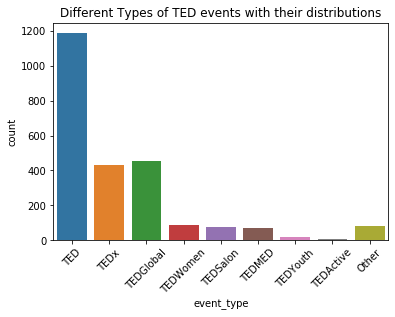

In [236]:
label_order = ['TED', 'TEDx', 'TEDGlobal', 'TEDWomen', 'TEDSalon', 'TEDMED', 'TEDYouth', 'TEDActive', 'Other']
chart = sns.countplot(data = df_clean, x ='event_type', order = label_order, orient = 'h')
chart.set_xticklabels(labels = label_order,  rotation=45)
plt.title('Different Types of TED events with their distributions')

As can be seen, more popular TED events (TED, TEDx, TEDGlobal) garner much hiogher level of comments and engagement compared to ther categories of TED events. 
Amongst the versions outside of major three, TED Salon seems to have higher share of engagement than the others while TEDYouth has the least


### Lets clean and describe the talks themselves

Text(0.5, 1.0, 'Histogram of talk duration (s), with mean in red')

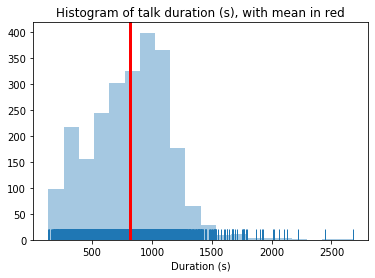

In [237]:
# Duration of the talks
sns.distplot(df_clean['duration'], bins=20, kde=False, rug=True, axlabel = 'Duration (s)')
mean_time = np.mean(df_clean['duration'])
# mean_time
plt.axvline(mean_time, 0,1, c = 'r', linewidth = 3)
# plt.axvline([500, 1500], 0,1, c = 'b', linewidth = 1)
plt.title('Histogram of talk duration (s), with mean in red')

In [238]:
# Look at Word Count distributions
df_clean['word_per_min'] = (df_clean.word_count/df_clean.duration)*60
# print('The mean length of the talks is %d minutes'%(mean_time/60))
df_clean = df_clean.astype({'word_per_min' : int})

Text(0.5, 1.0, 'Histogram of words per minute in talks')

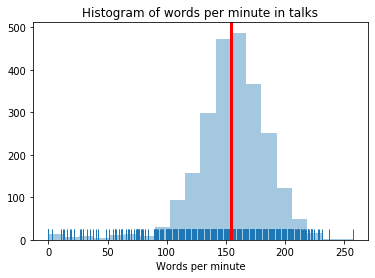

In [239]:
# Word counts
sns.distplot(df_clean['word_per_min'], bins=20, kde=False, rug=True, axlabel = 'Words per minute')
mean_wc = np.mean(df_clean['word_per_min'])
# mean_time
plt.axvline(mean_wc, 0,1, c = 'r', linewidth = 3)
# plt.axvline([500, 1500], 0,1, c = 'b', linewidth = 1)
plt.title('Histogram of words per minute in talks')

We see lot of outliers in both duration and word_per_min. These are either musical performances, interviews, conversations, or outliers of some sort. WE will drop thees values to not contaminate the dataset


In [240]:
# Remove outliers based on duration
duration_limits = df_clean.duration.quantile([0.01, 0.99])
duration_filter = (df_clean.duration >= duration_limits[0.01])&(df_clean.duration <= duration_limits[0.99])
df_clean = df_clean[duration_filter]

In [241]:
# Remove outliers based on words_per_min
wpm_limits = df_clean.word_per_min.quantile([0.01, 0.99])
wpm_filter = (df_clean.word_per_min >= wpm_limits[0.01])&(df_clean.word_per_min <= wpm_limits[0.99])
df_clean = df_clean[wpm_filter]

In [242]:
print ('The number of talks in the cleaned dataset are', df_clean.shape[0])

The number of talks in the cleaned dataset are 2314


Text(0.5, 1.0, 'Histogram of talk duration(s), without outliers')

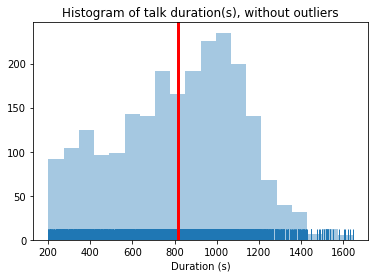

In [243]:
# Plotting distributions again
sns.distplot(df_clean['duration'], bins=20, kde=False, rug=True, axlabel = 'Duration (s)')
mean_time = np.mean(df_clean['duration'])
# mean_time
plt.axvline(mean_time, 0,1, c = 'r', linewidth = 3)
plt.title('Histogram of talk duration(s), without outliers')

Text(0.5, 1.0, 'Histogram of words per minute in talks, without outliers')

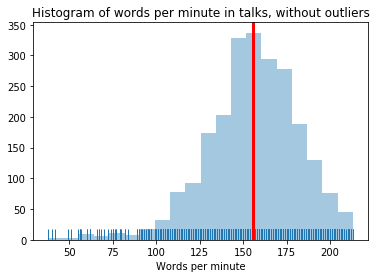

In [244]:
# Word counts
sns.distplot(df_clean['word_per_min'], bins=20, kde=False, rug=True, axlabel = 'Words per minute')
mean_wc = np.mean(df_clean['word_per_min'])
# mean_time
plt.axvline(mean_wc, 0,1, c = 'r', linewidth = 3)
plt.title('Histogram of words per minute in talks, without outliers')

In [245]:
print('The mean length of the talks is about %d minutes (%d seconds to be exact)'%((mean_time/60), mean_time))

The mean length of the talks is about 13 minutes (816 seconds to be exact)


In [246]:
print('The mean words per minute of all talks is %d'%mean_wc)

The mean words per minute of all talks is 155


# Correlations with audience ratings

In [247]:
df_clean.shape

(2314, 30)

In [248]:
df_clean.columns

Index(['description', 'duration', 'event', 'main_speaker',
       'speaker_occupation', 'tags', 'title', 'transcript', 'film_datestamp',
       'pub_datestamp', 'sentence_count', 'word_count', 'applause', 'laughter',
       'music', 'cheering', 'sighs', 'singing', 'video', 'audio', 'Funny',
       'Beautiful', 'Informative', 'Fascinating', 'Inspiring', 'event_type',
       'BadTalk', 'Max_rating', 'ratings_total', 'word_per_min'],
      dtype='object')

## Predictors for funny talks

Text(0.5, 1.0, 'Funny vs laughter')

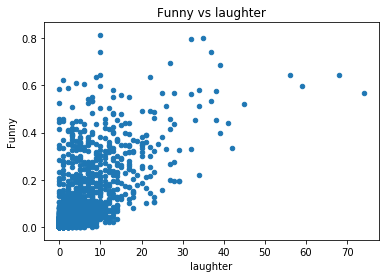

In [249]:
df_clean.plot.scatter( 'laughter', 'Funny')
# Add "Unconvincing" to "Obnoxious" and drop it
plt.title('Funny vs laughter')

From above plot, we see that talks rated as funny have higher number of audience reactions with 'laughter', making it a strong predictor

Text(0.5, 1.0, 'Bad Talks vs word_per_min')

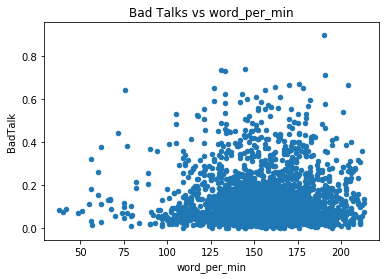

In [250]:
df_clean.plot.scatter( 'word_per_min', 'BadTalk')
# Add "Unconvincing" to "Obnoxious" and drop it
plt. title('Bad Talks vs word_per_min')

## Write to file

In [251]:
df_clean.to_csv('After_Storytelling.csv')

In [252]:
df_clean.shape

(2314, 30)

# Appendix

In [102]:
df_clean.shape

(2173, 34)

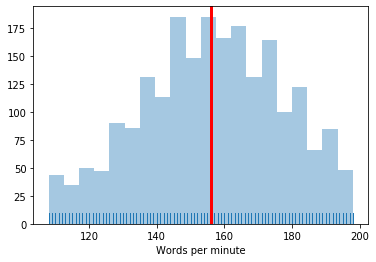

In [103]:
# Word counts
sns.distplot(df_clean['word_per_min'], bins=20, kde=False, rug=True, axlabel = 'Words per minute')
mean_wc = np.mean(df_clean['word_per_min'])
# mean_time
plt.axvline(mean_wc, 0,1, c = 'r', linewidth = 3)
# plt.axvline([500, 1500], 0,1, c = 'b', linewidth = 1)df_clean.sort_values('word_per_min').head(10)

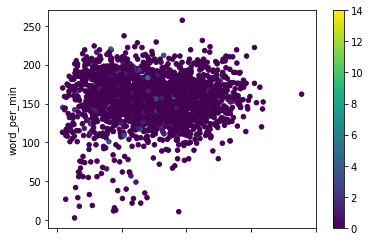

In [288]:
df_clean.plot.scatter('Inspiring', 'word_per_min', c = df_clean.video, cmap = 'viridis')

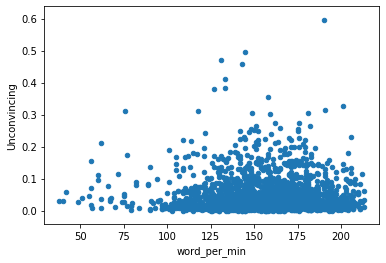

In [170]:
df_clean.plot.scatter( 'word_per_min', 'Unconvincing')
# Add "Unconvincing" to "Obnoxious" and drop it


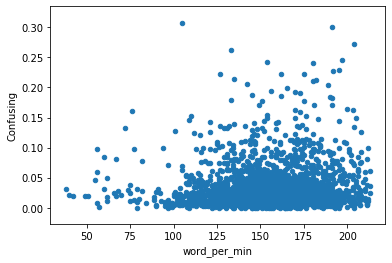

In [172]:
df_clean.plot.scatter( 'word_per_min', 'Confusing')
# Add "Unconvincing" to "Obnoxious" and drop it